# Predicción de Series Temporales
## VAR

In [1]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r",encoding="utf-8").read()
    return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: 'style.css'

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Packages

In [3]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yahoofinancials as yf
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str

In [4]:
# Importamos la libreria de gráficos Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(9, 4.5)})

In [5]:
from yahoofinancials import YahooFinancials

## Datos
Seleccionamos la base de datos macroeconomicos de Statsmodels

In [6]:
yf_BMW = YahooFinancials('BMW.DE')
data_BMW = yf_BMW.get_historical_price_data(
  start_date='2009-01-30',
  end_date='2020-11-01', 
  time_interval='monthly'
) 
 
df_BMW = pd.DataFrame(data_BMW['BMW.DE']['prices'])
df_BMW['formatted_date'] = pd.to_datetime(df_BMW['formatted_date'])
df_BMW = df_BMW.set_index("formatted_date")
df_BMW = df_BMW[["adjclose"]]
df_BMW.head()

,adjclose
formatted_date,
2009-01-31,12.627486
2009-02-28,13.931795
2009-03-31,16.783369
2009-04-30,16.236712
2009-05-31,17.371111


In [7]:
yf_VOW = YahooFinancials('VOW.DE')
data_VOW = yf_VOW.get_historical_price_data(
  start_date='2009-01-30',
  end_date='2020-11-01', 
  time_interval='monthly'
) 
 
df_VOW = pd.DataFrame(data_VOW['VOW.DE']['prices'])
df_VOW['formatted_date'] = pd.to_datetime(df_VOW['formatted_date'])
df_VOW = df_VOW.set_index("formatted_date")
df_VOW = df_VOW[["adjclose"]]
df_VOW.head()

,adjclose
formatted_date,
2009-01-31,144.706543
2009-02-28,178.035248
2009-03-31,184.139099
2009-04-30,165.715973
2009-05-31,187.178558


In [8]:
df_BMW_m = df_BMW.resample("m").last().to_period("M")
df_BMW_m

,adjclose
formatted_date,
2009-01,12.627486
2009-02,13.931795
2009-03,16.783369
2009-04,16.236712
2009-05,17.371111
...,...
2020-06,52.228565
2020-07,57.432327
2020-08,59.189190


In [9]:
df_VOW_m = df_VOW.resample("m").last().to_period("M")
df_VOW_m

,adjclose
formatted_date,
2009-01,144.706543
2009-02,178.035248
2009-03,184.139099
2009-04,165.715973
2009-05,187.178558
...,...
2020-06,126.226013
2020-07,142.872238
2020-08,141.921021


In [10]:
df_data = df_BMW_m.merge(df_VOW_m, on="formatted_date", suffixes=["BMW", "VOW"])
df_data

,adjcloseBMW,adjcloseVOW
formatted_date,,
2009-01,12.627486,144.706543
2009-02,13.931795,178.035248
2009-03,16.783369,184.139099
2009-04,16.236712,165.715973
2009-05,17.371111,187.178558
...,...,...
2020-06,52.228565,126.226013
2020-07,57.432327,142.872238
2020-08,59.189190,141.921021


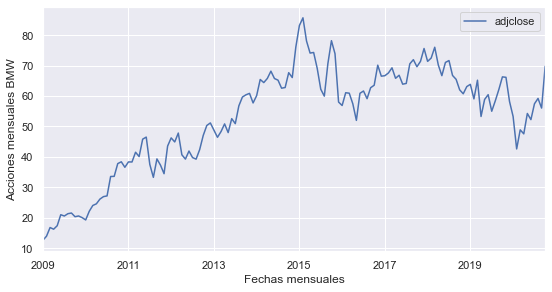

In [11]:
ax_1 = df_BMW_m.plot(linestyle = '-')
ax_1.set_ylabel("Acciones mensuales BMW") # Añadimos título al eje y 
ax_1.set_xlabel("Fechas mensuales"); # Añadimos título al eje x
# Guardamos la imagen para poder incluirla en el informe
plt.savefig("BMW time series.png", dpi=300, bbox_inches='tight')

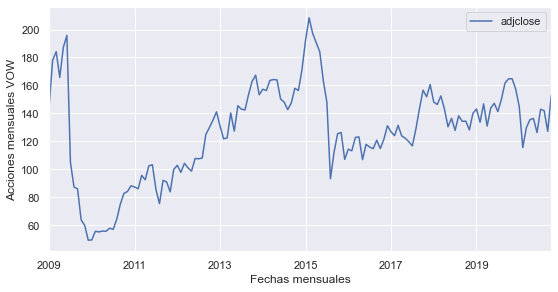

In [12]:
ax_2 = df_VOW_m.plot(linestyle = '-')
ax_2.set_ylabel("Acciones mensuales VOW") # Añadimos título al eje y 
ax_2.set_xlabel("Fechas mensuales"); # Añadimos título al eje x
# Guardamos la imagen para poder incluirla en el informe
plt.savefig("VOW time series.png", dpi=300, bbox_inches='tight')

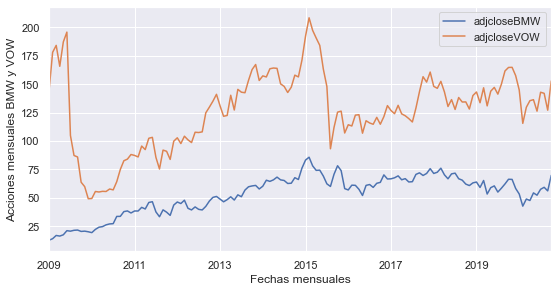

In [13]:
ax_3 = df_data.plot(linestyle = '-')
ax_3.set_ylabel("Acciones mensuales BMW y VOW") # Añadimos título al eje y 
ax_3.set_xlabel("Fechas mensuales"); # Añadimos título al eje x
# Guardamos la imagen para poder incluirla en el informe
plt.savefig("Both time series together.png", dpi=300, bbox_inches='tight')

In [14]:
df_data_scaled = df_data
df_data_scaled["adjcloseBMW"] = (df_data["adjcloseBMW"] - min(df_data["adjcloseBMW"])) / (max(df_data["adjcloseBMW"]) - min(df_data["adjcloseBMW"]))
df_data_scaled["adjcloseVOW"] = (df_data["adjcloseVOW"] - min(df_data["adjcloseVOW"])) / (max(df_data["adjcloseVOW"]) - min(df_data["adjcloseVOW"]))
df_data_scaled

,adjcloseBMW,adjcloseVOW
formatted_date,,
2009-01,0.000000,0.600077
2009-02,0.017855,0.809308
2009-03,0.056891,0.847627
2009-04,0.049408,0.731970
2009-05,0.064937,0.866708
...,...,...
2020-06,0.542112,0.484060
2020-07,0.613348,0.588562
2020-08,0.637399,0.582590


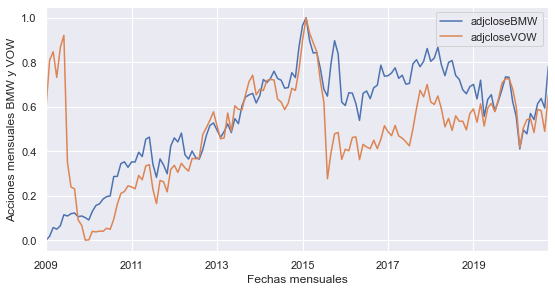

In [15]:
ax_4 = df_data_scaled.plot(linestyle = '-')
ax_4.set_ylabel("Acciones mensuales BMW y VOW") # Añadimos título al eje y 
ax_4.set_xlabel("Fechas mensuales"); # Añadimos título al eje x
# Guardamos la imagen para poder incluirla en el informe
plt.savefig("Both time series together (scaled).png", dpi=300, bbox_inches='tight')

## Test de Causalidad de Granger
Hasta 4 retardos

In [16]:
gc_res = grangercausalitytests(df_data[['adjcloseVOW', 'adjcloseBMW']], 12)
# Volkswagen explica a BMW para los retardos 2,3,4,5,6.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6348  , p=0.1068  , df_denom=138, df_num=1
ssr based chi2 test:   chi2=2.6920  , p=0.1009  , df=1
likelihood ratio test: chi2=2.6667  , p=0.1025  , df=1
parameter F test:         F=2.6348  , p=0.1068  , df_denom=138, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2121  , p=0.0434  , df_denom=135, df_num=2
ssr based chi2 test:   chi2=6.6621  , p=0.0358  , df=2
likelihood ratio test: chi2=6.5085  , p=0.0386  , df=2
parameter F test:         F=3.2121  , p=0.0434  , df_denom=135, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0100  , p=0.0326  , df_denom=132, df_num=3
ssr based chi2 test:   chi2=9.5088  , p=0.0232  , df=3
likelihood ratio test: chi2=9.1976  , p=0.0268  , df=3
parameter F test:         F=3.0100  , p=0.0326  , df_denom=132, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.3583  , p=0.0119  

## Modelo VAR

In [17]:
df_data

,adjcloseBMW,adjcloseVOW
formatted_date,,
2009-01,0.000000,0.600077
2009-02,0.017855,0.809308
2009-03,0.056891,0.847627
2009-04,0.049408,0.731970
2009-05,0.064937,0.866708
...,...,...
2020-06,0.542112,0.484060
2020-07,0.613348,0.588562
2020-08,0.637399,0.582590


In [18]:
returns_df = np.log(df_data).diff().dropna()
returns_df

,adjcloseBMW,adjcloseVOW
formatted_date,,
2009-02,inf,0.299122
2009-03,1.158852,0.046261
2009-04,-0.141032,-0.146701
2009-05,0.273308,0.168962
2009-06,0.566840,0.060644
...,...,...
2020-06,-0.049852,-0.122895
2020-07,0.123460,0.195473
2020-08,0.038462,-0.010198


In [19]:
model = VAR(returns_df)

## Estimamos  un modelo VAR(2) sin constante

In [20]:
# Lo estimamos sin constante, por eso le pongo tren="n"
results = model.fit(15,trend='n')
results.summary()
# La L1 es un lag1 e indica el retardo. Recordad que solo le he puesto 2 retardos
# también hay correlación entre los residuos.
# hasta 0.05 se dice que las variables explican

LinAlgError: SVD did not converge in Linear Least Squares

## Gráfico de los datos

In [ ]:
# se pone ; para que solo salga una vez.
results.plot();

## Correlaciones de los residuos

¿Son ruido blanco?

In [ ]:
results.plot_acorr();
# nos fijamos en la primera columna

## Predicción
### Es necesario darle los valores iniciales, para la predicción recursiva. 
### ES el orden del VAR


In [ ]:
results.plot_forecast(12);
# las líneas de abajo son intervalos de confianza

## Función de Respuesta al Impulso

In [ ]:
irf = results.irf(10) # el 10 hace referencia a los periodos que cojo: 10 trimestres.

In [ ]:
irf.plot(orth=False); # para que no tenga en cuenta la ortogonalidad en los residuos
# si el 0 entra dentro del intervalo de confianza, entonces el aumento es estadísticamente 0. 
# por ej el aumento de la inversón no tiene relevancia en el aumento del consumo porque el 0 está dentro del 
# intervalo de confianza

In [ ]:
lag_order = results.k_ar
results.forecast(returns_df.values[-lag_order:], 5)
# el 5 indica los trimestres que quiero predecir

## Función de Respuesta al Impulso(Individual)

In [ ]:
irf.plot(impulse='realcons'); # Solo cojo una columna (solo el consumo)
# si aumento el consumo hoy, voy a ver un aumento de 0.7 en el gdp

## Función de Respuesta al Impulso ACUMULADA

In [ ]:
irf.plot_cum_effects(orth=False);
# la línea negra es la línea asintótica
# impulso en el consumo, me genera un aumento acumulado!!! en el gdp. Este muestra el aumento acumulado.
# la línea azul es el efecto puntual. Las líneas discontinuas son los intervalos de confianza


## Descomposiciñon del error de predicción

In [ ]:
fevd = results.fevd(5)

In [ ]:
fevd.summary()

In [ ]:
results.fevd(20).plot();
# gráfico porcentual en cada instante del tiempo.
# lo que se mira aquí es el porcentaje de la varianza

## Selección Automática del VAR

Input: orden máximo

In [ ]:
model.select_order(15)
# el 15 hace referencia al pmax
# aquí selecciona el modelo

## Estimación del Modelo Seleccionado

In [ ]:
# ic es el criterio de información
# aquí de lo seleccionado le digo que me coja de máximo 15
results = model.fit(maxlags=15, ic='aic')
results.summary()
# nos sale un var(3)

## Predicción

In [ ]:
lag_order = results.k_ar
results.forecast(returns_df.values[-lag_order:], 5)

In [ ]:
results.plot_forecast(10);

### Función de Respuesta al Impulso

In [ ]:
irf = results.irf(10)

In [ ]:
irf.plot(orth=False);

### Función de Respuesta al Impulso Individual

In [ ]:
irf.plot(impulse='realcons');

### Función de Respuesta al Impulso ACUMULADA

In [ ]:
irf.plot_cum_effects(orth=False);

### Descomposición de la Varianza del Error de Predicción

In [ ]:
fevd = results.fevd(5)

In [ ]:
fevd.summary()

In [ ]:
results.fevd(20).plot();

## Análisis de Causalidad de Granger

In [ ]:
results.test_causality('realgdp', ['realinv', 'realcons'], kind='f').summary()

### Normalidad

In [ ]:
results.test_normality().summary()

In [ ]:
def trading(lista_activos):
    